In [4]:
f = open("../api_key.txt", "r")
api_key = f.readline()

In [91]:
import requests
import json
from os.path import exists
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
def grab_daily_data(company_label, api_key):
    file_path = "../data/" + company_label + ".json"
    if exists(file_path):
        f = open(file_path)
        return json.load(f)
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=' + company_label + "&outputsize=full&apikey=" + api_key
    r = requests.get(url)
    data = r.json()
    with open("../data/" + company_label + ".json", "w") as output_file:
        json.dump(data, output_file)
    return data

In [130]:
def get_closing_price(target):
    if isinstance(target, str):
        target = grab_daily_data(target, api_key)
    time_series = []
    stock_prices = []
    for day in target['Time Series (Daily)']:
        time_series.append(day)
        stock_prices.append(target['Time Series (Daily)'][day]['4. close'])
    time_series = pd.to_datetime(time_series)
    stock_prices = np.array(stock_prices).astype(float)
    return time_series, stock_prices

In [75]:
def plot_close_prices(target):
    time_series, stock_prices = get_closing_price(target)
    fig, ax = plt.subplots()
    ax.plot(time_series, stock_prices)

In [83]:
def preprocess_data(target):
    time_series, stock_prices = get_closing_price(target)
    x = []
    y = []
    for i in range(0, len(time_series) - 369):
        x.append(stock_prices[0 + i:365+i])
        y.append(sum(stock_prices[365+i: 370+i]) / 5)
    return x, y

In [84]:
x, y = preprocess_data("IBM")

In [110]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(365,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(loss='mean_absolute_error',
              metrics=[tf.keras.metrics.MeanSquaredError()],
              optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(np.asarray(x), np.asarray(y), batch_size=32, verbose='0', epochs=30)

Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


In [111]:
y_prediction = model.predict(np.asarray(x))

169/169 [==============================] - 0s 967us/step


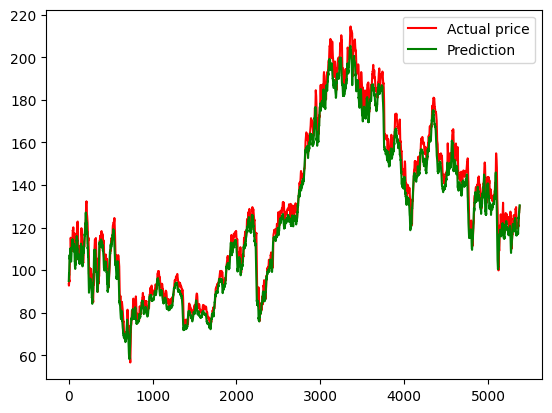

In [161]:
fig, ax = plt.subplots()
plt.plot(np.flip(y), 'r')
plt.plot(np.flip(y_prediction), 'g')
ax.legend(["Actual price", "Prediction"])
plt.show()

In [151]:
f = open('../data/amzn_sim.txt', 'w')
f.write(np.array2string(np.flip(amzn_y[-730:])))
f.write(np.array2string(np.flip(amzn_prediction[-730:])))

10220

In [165]:
array = np.flip(amzn_prediction[-730:])
my_dict = {str(i): str(array[i][0]) for i in range(0, 730)}
with open("../data/dis_pred.json", "w") as output_file:
    json.dump(my_dict, output_file)

In [163]:
amzn_x, amzn_y = preprocess_data("DIS")
amzn_prediction = model.predict(np.asarray(amzn_x))

169/169 [==============================] - 0s 985us/step


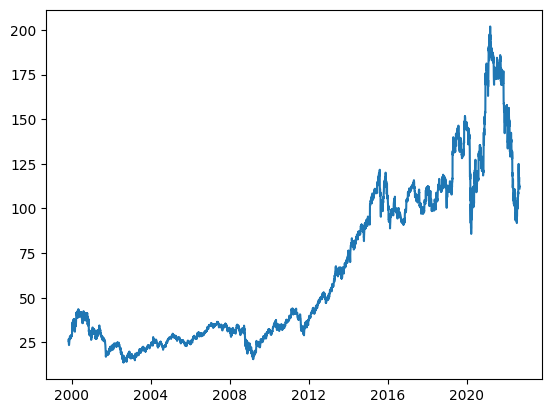

In [164]:
plot_close_prices("DIS")

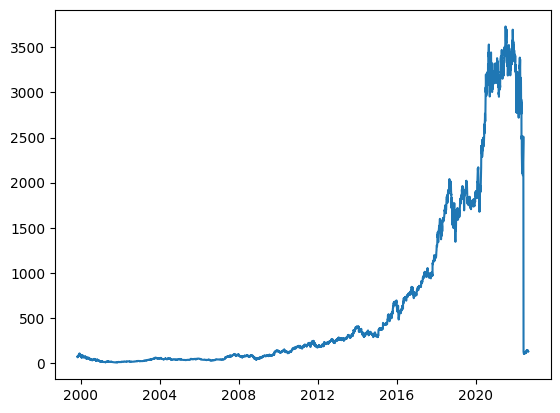

In [131]:
plot_close_prices("AMZN")